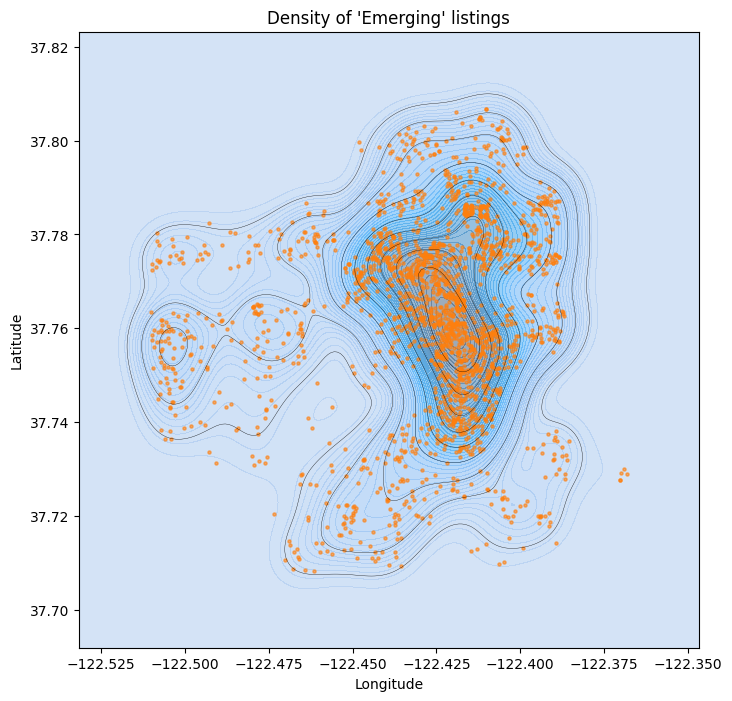

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
import numpy as np
from scipy.stats import gaussian_kde
import os

# -------------------------------------------------------------------
# 1. Load and prepare data
# -------------------------------------------------------------------
city ='sanfrancisco'
base_dir = os.path.expanduser(f"../../../data/AirbnbData/airbnb-{city}/")
df = pd.read_csv(base_dir + 'airbnb_gentrification_scores_categorical_combined_listings_filtered_04.csv')

df = df.rename(columns={'latitude': 'lat', 'longitude': 'lon', 
                        'gentrification_prediction': 'class'})
# print(df.head())
# print(df['class'].value_counts())

# Filter for the "Emerging" class
coords = df[df['class'] == 'Gentrifying'][['lat', 'lon']]

# -------------------------------------------------------------------
# 2. Graphical density approach (similar to geom_density_2d_filled)
# -------------------------------------------------------------------
plt.figure(figsize=(8, 8))
sns.kdeplot(
    x=coords['lon'], y=coords['lat'], fill=True, thresh=0, levels=50, alpha=0.5)
sns.kdeplot(
    x=coords['lon'], y=coords['lat'], color='black', linewidths=0.25)
plt.scatter(coords['lon'], coords['lat'], s=5, alpha=0.6)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Density of 'Emerging' listings")
plt.show()

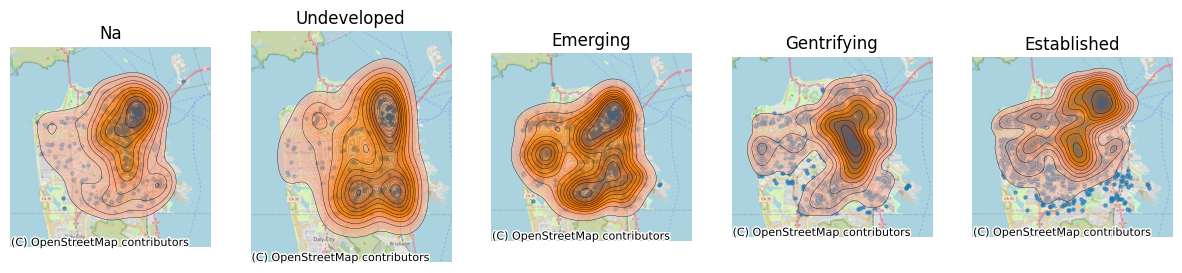

In [24]:
# -------------------------------------------------------------------
# 3. With backdrop (OpenStreetMap tiles)
# -------------------------------------------------------------------
fig, axs = plt.subplots(ncols =5, figsize=(15, 5))

for ax_num, gent_class in enumerate(['Na', 'Undeveloped', 'Emerging', 'Gentrifying', 'Established']):
    coords = df[df['class'] == gent_class][['lat', 'lon']]
    # Create GeoDataFrame
    df_sf = gpd.GeoDataFrame(
        df[df['class'] == gent_class],
        geometry=gpd.points_from_xy(df.loc[df['class'] == gent_class, 'lon'],
                                    df.loc[df['class'] == gent_class, 'lat']), crs="EPSG:4326").to_crs(epsg=3857)
    
    df_sf.plot(ax=axs[ax_num], markersize=5, alpha=0.6)
    
    # KDE overlay (in projected coords)
    x = df_sf.geometry.x
    y = df_sf.geometry.y
    sns.kdeplot(x=x, y=y, fill=True, alpha=0.5, levels=50, ax=axs[ax_num])
    sns.kdeplot(x=x, y=y, color='black', linewidths=0.25, ax=axs[ax_num])
        
    ctx.add_basemap(axs[ax_num], source=ctx.providers.OpenStreetMap.Mapnik)
    axs[ax_num].set_axis_off()
    axs[ax_num].set_title(f"{gent_class}")
    # plt.show()

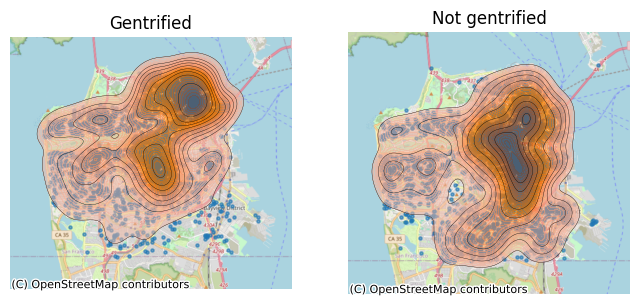

In [33]:
df['gentrified'] = df['class']
df['gentrified'] = np.where(df['class'].isin(['Established', 'Gentrified']), 'Gentrified', 'Not gentrified')


fig, axs = plt.subplots(ncols =2, figsize=(8, 5))

for ax_num, gent_class in enumerate(['Gentrified', 'Not gentrified']):
    coords = df[df['gentrified'] == gent_class][['lat', 'lon']]
    # Create GeoDataFrame
    df_sf = gpd.GeoDataFrame(
        df[df['gentrified'] == gent_class],
        geometry=gpd.points_from_xy(df.loc[df['gentrified'] == gent_class, 'lon'],
                                    df.loc[df['gentrified'] == gent_class, 'lat']), crs="EPSG:4326").to_crs(epsg=3857)
    
    df_sf.plot(ax=axs[ax_num], markersize=5, alpha=0.6)
    
    # KDE overlay (in projected coords)
    x = df_sf.geometry.x
    y = df_sf.geometry.y
    sns.kdeplot(x=x, y=y, fill=True, alpha=0.5, levels=50, ax=axs[ax_num])
    sns.kdeplot(x=x, y=y, color='black', linewidths=0.25, ax=axs[ax_num])
        
    ctx.add_basemap(axs[ax_num], source=ctx.providers.OpenStreetMap.Mapnik)
    axs[ax_num].set_axis_off()
    axs[ax_num].set_title(f"{gent_class}")

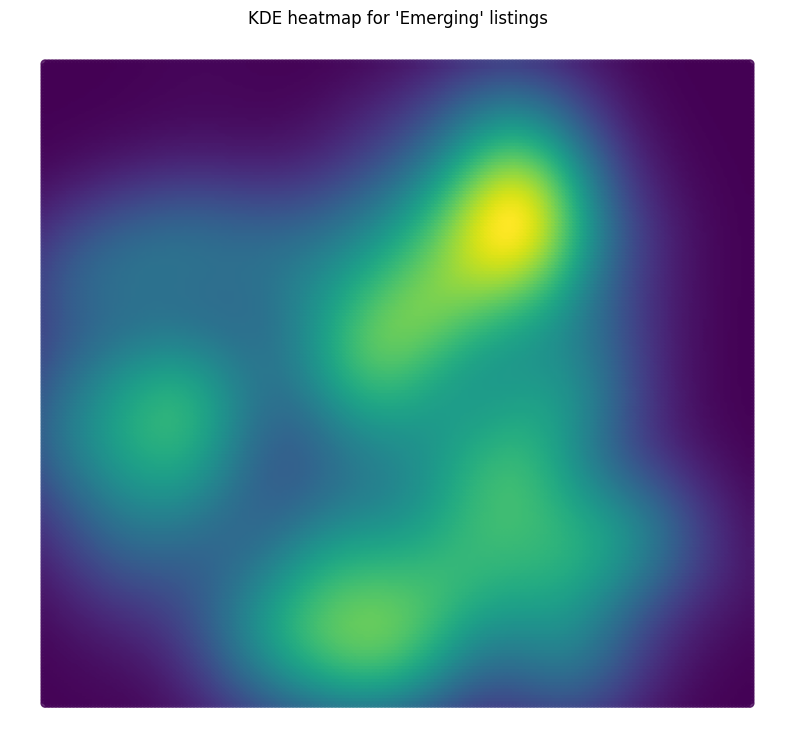

In [11]:
# -------------------------------------------------------------------
# 5. Plot KDE as color map (no backdrop)
# -------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))
kde_gdf.plot(column='kde', cmap='viridis', alpha=0.8, ax=ax)
plt.title("KDE heatmap for 'Emerging' listings")
ax.set_axis_off()
plt.show()

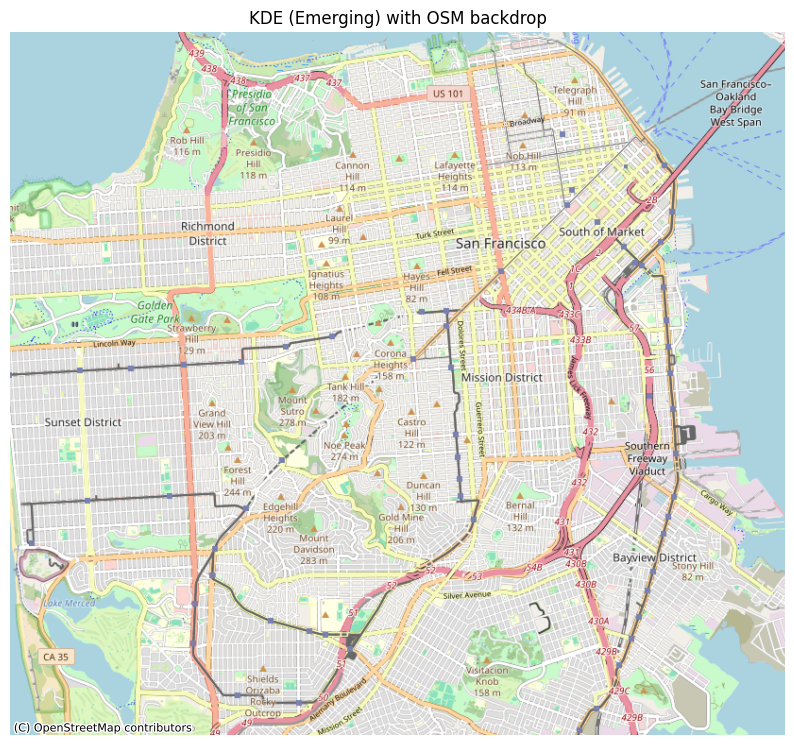

In [20]:
# -------------------------------------------------------------------
# 6. KDE with backdrop (raster-style)
# -------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(np.flipud(z), extent=[x_mesh.min(), x_mesh.max(), y_mesh.min(), y_mesh.max()],
           cmap='viridis', alpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.title("KDE (Emerging) with OSM backdrop")
plt.show()